    In general, we can follow a general EDA checklist:
.Examine the top and bottom of the data
.Examine the data's dimensions
.Examine the datatypes and missing values
.Investigate statistical properties of the data
.Create plots of the data

In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
csv_file = pd.read_csv(r"C:\Users\David gathara marigi\Downloads\itunes_data.csv")
xlsx_file = pd.read_excel(r"C:\Users\David gathara marigi\Downloads\itunes_data.xlsx", engine ='openpyxl')
engine = create_engine(r"sqlite:///C:\Users\David gathara marigi\Downloads\chinook.db")
query = """SELECT tracks.name as Track, 
tracks.composer, 
tracks.milliseconds,
tracks.bytes, 
tracks.unitprice,
genres.name as Genre,
albums.title as Album,
artists.name as Artist
FROM tracks
JOIN genres ON tracks.genreid = genres.genreid
JOIN albums ON tracks.albumid = albums.albumid
JOIN artists ON albums.artistid = artists.artistid;
"""
with engine.connect() as connection:
    sql_df = pd.read_sql_query(query, connection)
i_tunes = pd.concat([csv_file, xlsx_file, sql_df]) 
i_tunes.tail()


,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,286741,4718950,0.99,Classical,Respighi:Pines of Rome,Eugene Ormandy
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,Nash Ensemble
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble


In [3]:
print(i_tunes.iloc[0])
print(i_tunes.iloc[-1])

Track           All the Best Cowboys Have Daddy Issues
Composer                                           NaN
Milliseconds                                   2555492
Bytes                                        211743651
UnitPrice                                         1.99
Genre                                         TV Shows
Album                                   Lost, Season 1
Artist                                            Lost
Name: 0, dtype: object
Track                                               Koyaanisqatsi
Composer                                             Philip Glass
Milliseconds                                               206005
Bytes                                                     3305164
UnitPrice                                                    0.99
Genre                                                  Soundtrack
Album           Koyaanisqatsi (Soundtrack from the Motion Pict...
Artist                                      Philip Glass Ensemble
Name: 350

In [4]:
print(i_tunes.iloc[0, 0])
print(i_tunes.iloc[-1, -1])

All the Best Cowboys Have Daddy Issues
Philip Glass Ensemble


In [5]:
print(i_tunes.loc[3502])

Track                                               Koyaanisqatsi
Composer                                             Philip Glass
Milliseconds                                               206005
Bytes                                                     3305164
UnitPrice                                                    0.99
Genre                                                  Soundtrack
Album           Koyaanisqatsi (Soundtrack from the Motion Pict...
Artist                                      Philip Glass Ensemble
Name: 3502, dtype: object


In [6]:
test_df = i_tunes.copy()
test_df = pd.concat([test_df, pd.DataFrame([i_tunes.loc[3502]])])
test_df.loc[3502]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble
3502,Koyaanisqatsi,Philip Glass,206005,3305164,0.99,Soundtrack,Koyaanisqatsi (Soundtrack from the Motion Pict...,Philip Glass Ensemble


In [7]:
test_df.reset_index(inplace=True, drop=True)
print(test_df)


                                                  Track  \
0                All the Best Cowboys Have Daddy Issues   
1                                             Beira Mar   
2                                                Brasil   
3                                          Ben Franklin   
4                          O Último Romântico (Ao Vivo)   
...                                                 ...   
4017  String Quartet No. 12 in C Minor, D. 703 "Quar...   
4018               L'orfeo, Act 3, Sinfonia (Orchestra)   
4019  Quintet for Horn, Violin, 2 Violas, and Cello ...   
4020                                      Koyaanisqatsi   
4021                                      Koyaanisqatsi   

                               Composer  Milliseconds      Bytes  UnitPrice  \
0                                   NaN       2555492  211743651       1.99   
1                          Gilberto Gil        295444    9597994       0.99   
2     Milton Nascimento, Fernando Brant        155428 

In [8]:
i_tunes['Milliseconds']

0       2555492
1        295444
2        155428
3       1271938
4        231993
         ...   
3498     286741
3499     139200
3500      66639
3501     221331
3502     206005
Name: Milliseconds, Length: 4021, dtype: int64

In [9]:
i_tunes[['Milliseconds', 'Bytes', 'Genre']]

,Milliseconds,Bytes,Genre
0,2555492,211743651,TV Shows
1,295444,9597994,Latin
2,155428,5252560,Latin
3,1271938,264168080,Comedy
4,231993,7692697,Latin
...,...,...,...
3498,286741,4718950,Classical
3499,139200,2283131,Classical
3500,66639,1189062,Classical
3501,221331,3665114,Classical


                      Examining the data's dimensions, datatypes, and missing values

In [10]:
print(i_tunes.shape)

(4021, 8)


In [11]:
i_tunes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4021 entries, 0 to 3502
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Track         4021 non-null   object 
 1   Composer      2908 non-null   object 
 2   Milliseconds  4021 non-null   int64  
 3   Bytes         4021 non-null   int64  
 4   UnitPrice     4021 non-null   float64
 5   Genre         4021 non-null   object 
 6   Album         4021 non-null   object 
 7   Artist        4021 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 411.8+ KB


In [12]:
i_tunes.isna().sum()    

Track              0
Composer        1113
Milliseconds       0
Bytes              0
UnitPrice          0
Genre              0
Album              0
Artist             0
dtype: int64

                                 Investigating statistical properties of the data

In [13]:
i_tunes.describe()

,Milliseconds,Bytes,UnitPrice
count,4.021000e+03,4.021000e+03,4021.000000
mean,3.927276e+05,3.311048e+07,1.050184
std,5.337745e+05,1.042268e+08,0.237857
min,1.071000e+03,3.874700e+04,0.990000
25%,2.069680e+05,6.372433e+06,0.990000
50%,2.554770e+05,8.102839e+06,0.990000
75%,3.217240e+05,1.025143e+07,0.990000
max,5.286953e+06,1.059546e+09,1.990000


In [14]:
i_tunes['Genre'].mode()

0    Rock
Name: Genre, dtype: object

In [15]:
i_tunes['Genre'].value_counts()

Genre
Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
TV Shows               105
Blues                   92
Classical               85
Drama                   71
R&B/Soul                69
Reggae                  64
Pop                     51
Soundtrack              50
Alternative             45
Hip Hop/Rap             40
Electronica/Dance       35
World                   32
Heavy Metal             31
Sci Fi & Fantasy        31
Easy Listening          28
Comedy                  20
Bossa Nova              17
Science Fiction         15
Rock And Roll           12
Opera                    1
Name: count, dtype: int64

In [16]:
i_tunes['Genre'].value_counts().head(5)

Genre
Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
Name: count, dtype: int64

In [17]:
i_tunes['Genre'].value_counts()[:5]

Genre
Rock                  1498
Latin                  656
Metal                  420
Alternative & Punk     393
Jazz                   160
Name: count, dtype: int64

In [18]:
i_tunes['Artist'].unique().shape


(204,)

In [19]:
i_tunes.select_dtypes(include="number").corr()

,Milliseconds,Bytes,UnitPrice
Milliseconds,1.000000,0.957791,0.934829
Bytes,0.957791,1.000000,0.938734
UnitPrice,0.934829,0.938734,1.000000


                             Plotting with DataFrames

In [20]:
import matplotlib.pyplot as plt


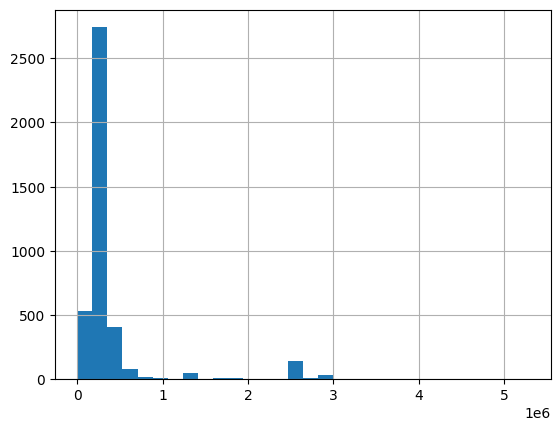

In [21]:
i_tunes['Milliseconds'].hist(bins=30)
plt.show()

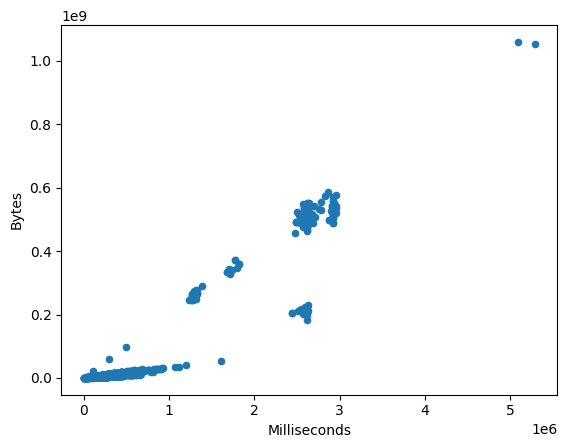

In [22]:
i_tunes.plot.scatter(x='Milliseconds', y='Bytes')
plt.show()

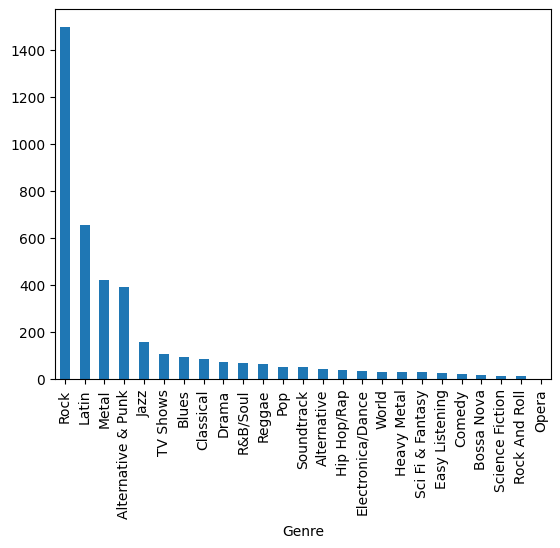

In [23]:
i_tunes['Genre'].value_counts().plot.bar()
plt.show()


                                             cleaning data

Some common data cleaning steps include:
. Removing irrelevant data
. Dealing with missing values (filling in or dropping them)
. Dealing with outliers
. Dealing with duplicate values
. Ensuring datatypes are correct
. Standardizing data formats (e.g. mismatched capitalization, converting units)

                                       Filtering DataFrame

In [24]:
i_tunes[i_tunes['Milliseconds'] > 4e6]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
2833,Occupation / Precipice,None,5286953,1054423946,1.99,TV Shows,"Battlestar Galactica, Season 3",Battlestar Galactica
2898,Through a Looking Glass,None,5088838,1059546140,1.99,Drama,"Lost, Season 3",Lost


In [25]:
i_tunes['Milliseconds'] > 4e6

0       False
1       False
2       False
3       False
4       False
        ...  
3498    False
3499    False
3500    False
3501    False
3502    False
Name: Milliseconds, Length: 4021, dtype: bool

In [26]:
i_tunes[i_tunes['Milliseconds'] > 2e6]['Genre'].value_counts()

Genre
Drama               69
TV Shows            67
Sci Fi & Fantasy    31
Science Fiction     15
Comedy               2
Name: count, dtype: int64

In [27]:
i_tunes[(i_tunes['Milliseconds'] > 2e6) & (i_tunes['Bytes'] < 0.4e9)]['Genre'].value_counts()


Genre
TV Shows    32
Name: count, dtype: int64

In [28]:
i_tunes[i_tunes['Genre'] != 'TV Shows']

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos
5,Freewheel Burning,NaN,265952,8713599,0.99,Metal,Living After Midnight,Judas Priest
...,...,...,...,...,...,...,...,...
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,286741,4718950,0.99,Classical,Respighi:Pines of Rome,Eugene Ormandy
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,Nash Ensemble


In [29]:
i_tunes[~(i_tunes['Genre'] == 'TV Shows')]

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
1,Beira Mar,Gilberto Gil,295444,9597994,0.99,Latin,Unplugged,Eric Clapton
2,Brasil,"Milton Nascimento, Fernando Brant",155428,5252560,0.99,Latin,Milton Nascimento Ao Vivo,Milton Nascimento
3,Ben Franklin,NaN,1271938,264168080,1.99,Comedy,"The Office, Season 3",The Office
4,O Último Romântico (Ao Vivo),NaN,231993,7692697,0.99,Latin,Lulu Santos - RCA 100 Anos De Música - Álbum 02,Lulu Santos
5,Freewheel Burning,NaN,265952,8713599,0.99,Metal,Living After Midnight,Judas Priest
...,...,...,...,...,...,...,...,...
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,286741,4718950,0.99,Classical,Respighi:Pines of Rome,Eugene Ormandy
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,139200,2283131,0.99,Classical,Schubert: The Late String Quartets & String Qu...,Emerson String Quartet
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,66639,1189062,0.99,Classical,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical,Mozart: Chamber Music,Nash Ensemble


In [30]:
i_tunes[i_tunes['Genre'].str.contains('TV')]


,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
0,All the Best Cowboys Have Daddy Issues,NaN,2555492,211743651,1.99,TV Shows,"Lost, Season 1",Lost
23,Confidence Man,NaN,2615244,223756475,1.99,TV Shows,"Lost, Season 1",Lost
38,Diwali,NaN,1279904,252726644,1.99,TV Shows,"The Office, Season 3",The Office
148,The 23rd Psalm,NaN,2610416,487401604,1.99,TV Shows,"Lost, Season 2",Lost
209,"Lost (Pilot, Part 2)",NaN,2436583,204995876,1.99,TV Shows,"Lost, Season 1",Lost
...,...,...,...,...,...,...,...,...
3210,The Merger,None,1801926,345960631,1.99,TV Shows,"The Office, Season 3",The Office
3253,Pilot,None,2484567,492670102,1.99,TV Shows,Aquaman,Aquaman
3344,Eggtown,None,2608817,501061240,1.99,TV Shows,"LOST, Season 4",Lost
3347,Ji Yeon,None,2588797,506458858,1.99,TV Shows,"LOST, Season 4",Lost


                            Remove irrelavant data

In [31]:
i_tunes.drop('Composer', axis=1, inplace=True)
i_tunes.columns

Index(['Track', 'Milliseconds', 'Bytes', 'UnitPrice', 'Genre', 'Album',
       'Artist'],
      dtype='object')

In [32]:
only_music = i_tunes[~i_tunes['Genre'].isin(['Drama', 'TVShows', 'Sci Fi & Fantasy', 'Science Fiction', 'Comedy'])]
print(only_music.head(5))

                                    Track  Milliseconds      Bytes  UnitPrice  \
0  All the Best Cowboys Have Daddy Issues       2555492  211743651       1.99   
1                               Beira Mar        295444    9597994       0.99   
2                                  Brasil        155428    5252560       0.99   
4            O Último Romântico (Ao Vivo)        231993    7692697       0.99   
5                       Freewheel Burning        265952    8713599       0.99   

      Genre                                            Album  \
0  TV Shows                                   Lost, Season 1   
1     Latin                                        Unplugged   
2     Latin                        Milton Nascimento Ao Vivo   
4     Latin  Lulu Santos - RCA 100 Anos De Música - Álbum 02   
5     Metal                            Living After Midnight   

              Artist  
0               Lost  
1       Eric Clapton  
2  Milton Nascimento  
4        Lulu Santos  
5       Judas

                         Dealing with missing values


In terms of dealing with missing values, we have some options:
Leave the missing values as-is
Drop the data
Fill with a specific value
Replace with the mean, median, or mode
Use machine learning to replace missing values

In [33]:
test_df[test_df['Composer'].isna()].sample(5, random_state=42).head()

,Track,Composer,Milliseconds,Bytes,UnitPrice,Genre,Album,Artist
3465,Three Minutes,None,2763666,531556853,1.99,TV Shows,"Lost, Season 2",Lost
401,Romance Ideal,NaN,250070,8260477,0.99,Latin,Arquivo Os Paralamas Do Sucesso,Os Paralamas Do Sucesso
3845,Todo o Carnaval tem seu Fim,None,237426,9499371,0.99,Electronica/Dance,Radio Brasil (O Som da Jovem Vanguarda) - Sele...,O Rappa
2975,We've Got To Get Together/Jingo,None,1070027,34618222,0.99,Rock,Santana Live,Santana
1105,Vamos Dançar,None,226194,7617432,0.99,Latin,The Best of Ed Motta,Ed Motta


In [34]:
i_tunes.dropna(inplace=True)

In [35]:
if 'Composer' in i_tunes.columns:
	i_tunes['Composer'].fillna('Unknown', inplace=True)
else:
	print("'Composer' column not found in i_tunes")


'Composer' column not found in i_tunes


In [36]:
i_tunes['UnitPrice'] = i_tunes['UnitPrice'].fillna(i_tunes['UnitPrice'].mode()[0])

In [37]:
import numpy as np
i_tunes.loc[0, 'Bytes'] = np.nan
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputed = imputer.fit_transform(i_tunes [['Milliseconds', 'Bytes', 'UnitPrice']])
i_tunes['Bytes'] = imputed[:, 1]



                 Dealing with outier

In [38]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    new_df = df.loc[(df[column] > lower_boundary) & (df[column] < upper_boundary)]
    return new_df
itunes_df_clean = remove_outliers(i_tunes, 'Milliseconds')
print(itunes_df_clean.shape)

(3614, 7)


                                dealing with duplicated value

In [39]:
i_tunes.duplicated().sum()

516

In [40]:
i_tunes.drop_duplicates(inplace=True)


                             Ensuring datatype are correct

In [41]:
i_tunes['Milliseconds'] = i_tunes['Milliseconds'].astype('int')

                              Standardizing data formats

In [42]:
# Standardize column names: lower-case and replace spaces with underscores
i_tunes.columns = [col.lower().replace(" ", "_") for col in i_tunes.columns]

# Remove any extra whitespace from string columns
str_cols = i_tunes.select_dtypes(include=["object"]).columns
for col in str_cols:
    i_tunes[col] = i_tunes[col].str.strip()

# Optionally, round the unitprice column to two decimals
i_tunes["unitprice"] = i_tunes["unitprice"].round(2)

print(i_tunes.head(5))

                                    track  milliseconds        bytes  \
0  All the Best Cowboys Have Daddy Issues       2555492  381737603.6   
1                               Beira Mar        295444    9597994.0   
2                                  Brasil        155428    5252560.0   
3                            Ben Franklin       1271938  264168080.0   
4            O Último Romântico (Ao Vivo)        231993    7692697.0   

   unitprice     genre                                            album  \
0       1.99  TV Shows                                   Lost, Season 1   
1       0.99     Latin                                        Unplugged   
2       0.99     Latin                        Milton Nascimento Ao Vivo   
3       1.99    Comedy                             The Office, Season 3   
4       0.99     Latin  Lulu Santos - RCA 100 Anos De Música - Álbum 02   

              artist  
0               Lost  
1       Eric Clapton  
2  Milton Nascimento  
3         The Office  
4

                                      Data transformations

In [43]:
i_tunes['seconds'] = i_tunes['milliseconds'] / 1000


In [44]:
i_tunes['len_byte_ratio'] = i_tunes['milliseconds'] / i_tunes['bytes']

                                   Using replace, map, and apply to clean and transform data

In [45]:
genre_dict = {'metal': 'Metal', 'met': 'Metal'}
i_tunes['genre'].replace(genre_dict)

0         TV Shows
1            Latin
2            Latin
3           Comedy
4            Latin
           ...    
3496     Classical
3499     Classical
3500     Classical
3501     Classical
3502    Soundtrack
Name: genre, Length: 3505, dtype: object

In [46]:
i_tunes['genre'].apply(lambda x: x.lower())

0         tv shows
1            latin
2            latin
3           comedy
4            latin
           ...    
3496     classical
3499     classical
3500     classical
3501     classical
3502    soundtrack
Name: genre, Length: 3505, dtype: object

In [47]:
def lowercase(x):
    return x.lower()
i_tunes['genre'].apply(lowercase)

0         tv shows
1            latin
2            latin
3           comedy
4            latin
           ...    
3496     classical
3499     classical
3500     classical
3501     classical
3502    soundtrack
Name: genre, Length: 3505, dtype: object

In [48]:
i_tunes['genre'].str.lower()


0         tv shows
1            latin
2            latin
3           comedy
4            latin
           ...    
3496     classical
3499     classical
3500     classical
3501     classical
3502    soundtrack
Name: genre, Length: 3505, dtype: object

In [49]:
import swifter
i_tunes['genre'].swifter.apply(lambda x:x.lower())

c:\Users\David gathara marigi\AppData\Local\Programs\Python\Python311\Lib\site-packages\swifter\swifter.py:87: UserWarning: This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`.
  warnings.warn(


Pandas Apply:   0%|          | 0/3505 [00:00<?, ?it/s]

0         tv shows
1            latin
2            latin
3           comedy
4            latin
           ...    
3496     classical
3499     classical
3500     classical
3501     classical
3502    soundtrack
Name: genre, Length: 3505, dtype: object

                                                    using groupby

In [50]:
i_tunes.groupby('genre')['seconds'].mean().sort_values().head()


genre
Rock And Roll     134.643500
Opera             174.813000
Hip Hop/Rap       178.176286
Easy Listening    189.164208
Bossa Nova        219.590000
Name: seconds, dtype: float64

                                Writing DataFrames to disk

In [51]:
import os
os.makedirs('data', exist_ok=True)
i_tunes.to_csv('data/saved_itunes_data.csv', index=False)